In [1]:
import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline

numpy: 1.25.2
pandas: 1.5.3
re: 2.2.1
nltk: 3.8.1


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Preprocessing and Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import torch.nn as nn


import torch
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

from transformers import BertForSequenceClassification, BertTokenizer

import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Capstone Project 9

import CAP9_1_AirLineTwitter_config
## Define root folder
root_folder = CAP9_1_AirLineTwitter_config.RootFolder
OutputFiles  = root_folder+"\OutputFiles"
print(OutputFiles)



Mounted at /content/drive
/content/drive/MyDrive/Capstone Project 9
C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset\OutputFiles


In [5]:

df = pd.read_csv(OutputFiles+"/Step1.1.2_merge_tweets_df.csv")
print(df.shape)

(13806, 17)


In [6]:
df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class'],
      dtype='object')

In [7]:
df.sentiment_category.value_counts()

neutral     5392
positive    4819
negative    3595
Name: sentiment_category, dtype: int64

In [8]:
df['sentiment_category'] = df['sentiment_category'].map({'positive': 1, 'negative': 0, 'neutral': 2})

In [9]:
df.dropna(subset=['text'], inplace=True)

In [10]:
import torch
import transformers

# Reference: https://github.com/curiousily/Getting-Things-Done-with-Pytorch/blob/master/08.sentiment-analysis-with-bert.ipynb

In [11]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [12]:
sample_text = 'This is a new Thing'
tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_text}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: This is a new Thing
   Tokens: ['This', 'is', 'a', 'new', 'Thing']
Token IDs: [1188, 1110, 170, 1207, 11675]


In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

tokenizer.cls_token, tokenizer.cls_token_id

tokenizer.pad_token, tokenizer.pad_token_id

tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
encoding = tokenizer.encode_plus(
    sample_text,
    max_length=32,
    add_special_tokens=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_token_type_ids=False,
    return_tensors='pt'
)

print(encoding.keys())
print(encoding['input_ids'])
print(encoding['attention_mask'])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])
tensor([[  101,  1188,  1110,   170,  1207, 12216,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
token_lens = []

for txt in df.text:
  tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

<ipython-input-16-e522afe1f942>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

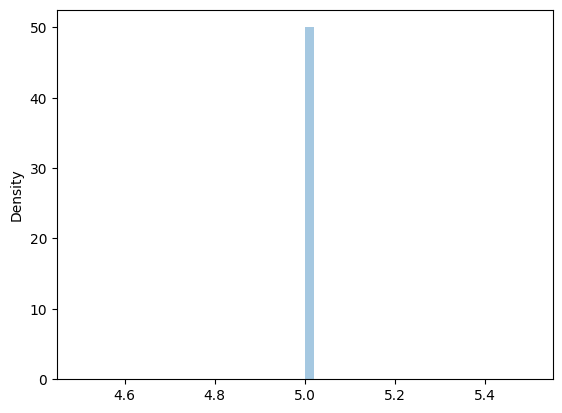

In [ ]:
sns.distplot(token_lens)

In [ ]:
# Step 1: Define Dataset Class
class CustomDataset(data.Dataset):
    def __init__(self, text, sentiment, tokenizer, max_length):
        self.text = text
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.sentiment = sentiment

    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):

      # Ensure text is of type str
      text = str(self.text[idx])

      # Tokenize text
      encoding = tokenizer.encode_plus(
      sample_text,
      max_length=32,
      add_special_tokens=True,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_token_type_ids=False,
      return_tensors='pt'
      )

      return {

          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          # 'attention_mask': encoding['attention_mask'].squeeze(),
          'label': torch.tensor(self.sentiment[idx], dtype=torch.long)
      }

In [ ]:
MAX_LENGTH = 16
BATCH_SIZE = 8
EPOCHS = 20

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

df_val, df_test = train_test_split(df_test, test_size=0.2, random_state=0)


In [ ]:
df_train.shape, df_val.shape, df_test.shape

((11044, 17), (2209, 17), (553, 17))

In [ ]:
def create_data_loader(df, tokenizer, max_length, batch_size):
  ds = CustomDataset(
      text = df.text.to_numpy(),
      sentiment = df.sentiment_category,
      tokenizer = tokenizer,
      max_length= max_length
  )
  return data.DataLoader(
      ds,
      batch_size=batch_size,
      num_workers=4
  )

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LENGTH, BATCH_SIZE)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LENGTH, BATCH_SIZE)

test_data_loader = create_data_loader(df_test, tokenizer, MAX_LENGTH, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

dict_keys(['input_ids', 'attention_mask', 'label'])

In [ ]:
data['input_ids'].shape

torch.Size([8, 32])

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

last_hidden_state = model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

In [ ]:
last_hidden_state


SequenceClassifierOutput(loss=None, logits=tensor([[0.8564, 0.1709]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
model.config.hidden_size

768

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("bert-base-uncased")
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)


In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

from transformers import BertForSequenceClassification, BertTokenizer

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels for your task
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Step 1: Define Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      if isinstance(self.data, np.ndarray):  # If data is a NumPy array
          text = self.data[idx][0]  # Assuming text is the first element
          label = self.data[idx][1]  # Assuming label is the second element
      elif isinstance(self.data, pd.DataFrame):  # If data is a pandas DataFrame
          text = self.data.iloc[idx]['cleaned_text_english_only']
          label = self.data.iloc[idx]['sentiment']
      else:
          raise TypeError("Unsupported data type. Expected NumPy array or pandas DataFrame.")

      # Ensure text is of type str
      text = str(text)

      # Tokenize text
      inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

      return {
          'input_ids': inputs['input_ids'].squeeze(),
          'attention_mask': inputs['attention_mask'].squeeze(),
          'label': torch.tensor(label, dtype=torch.long)
      }


# Step 2: Convert DataFrame to Dataset
# X_train, X_test, y_train, y_test
max_length = 128  # Adjust based on your maximum sequence length
dataset = CustomDataset(X_train, tokenizer, max_length)

# Step 3: Create DataLoader
batch_size = 32  # Adjust based on your requirements
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

max_length = 128  # Adjust based on your maximum sequence length
dataset = CustomDataset(X_test, tokenizer, max_length)

# Step 3: Create DataLoader
batch_size = 32  # Adjust based on your requirements
test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import torch.nn as nn

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels for your task
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 5: Tokenization and Data Preparation
# Example code for tokenization and data preparation
inputs = tokenizer(pos_neg_df['cleaned_text_english_only'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 6: Fine-tuning
# Example code for fine-tuning (you need to define your training loop)
# Example optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

num_epochs= 100

# Example training loop
for epoch in range(num_epochs):
    # Iterate over batches
    for batch in dataloader:
        inputs = {
        'input_ids': batch['input_ids'],
        'attention_mask': batch['attention_mask']
        }

        # Perform inference
        outputs = model(**inputs)
        # Forward pass
        # outputs = model(**batch)

        loss = criterion(outputs.logits, batch['label'])

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Step 7: Evaluation
# Example code for evaluation (you need to define your evaluation loop)
# Example evaluation loop
model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        inputs = {
        'input_ids': batch['input_ids'],
        'attention_mask': batch['attention_mask']
        }

        # Perform inference
        outputs = model(**inputs)
        # Calculate metrics

# Step 8: Save Model
# Example code for saving the model
model.save_pretrained("path_to_save_model")

# Step 9: Inference
# Example code for inference (loading the saved model)
# model = BertForSequenceClassification.from_pretrained("path_to_saved_model")

# Reference https://skimai.com/fine-tuning-bert-for-sentiment-analysis/

In [ ]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
pos_neg_df = df[df['sentiment_category'] != 'neutral']

In [ ]:
X = pos_neg_df.text.values
y = pos_neg_df.sentiment_category.values

In [ ]:
X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

Original:  @VirginAmerica What @dhepburn said.
Processed:  What said.


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
all_tweets = np.concatenate([pos_neg_df.text.values])

# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  67


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  @VirginAmerica What @dhepburn said.
Token IDs:  [101, 2054, 2056, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 70 µs, sys: 0 ns, total: 70 µs
Wall time: 73.9 µs


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")



No GPU available, using the CPU instead.


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time
# Specify loss function
loss_fn = nn.CrossEntropyLoss()
def set_seed(seed_value=42):
  """Set seed for reproducibility.
      """
  random.seed(seed_value)
  np.random.seed(seed_value)
  torch.manual_seed(seed_value)
  torch.cuda.manual_seed_all(seed_value)
def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
  """Train the BertClassifier model.
      """
  # Start training loop
  print("Start training...\n")
  for epoch_i in range(epochs):
    # =======================================
    #               Training
    # =======================================
    # Print the header of the result table
    print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
    print("-"*70)
    # Measure the elapsed time of each epoch
    t0_epoch, t0_batch = time.time(), time.time()
    # Reset tracking variables at the beginning of each epoch
    total_loss, batch_loss, batch_counts = 0, 0, 0
    # Put the model into the training mode
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
      batch_counts +=1
      # Load batch to GPU
      b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
      # Zero out any previously calculated gradients
      model.zero_grad()
      # Perform a forward pass. This will return logits.
      logits = model(b_input_ids, b_attn_mask)
      # Compute loss and accumulate the loss values
      loss = loss_fn(logits, b_labels)
      batch_loss += loss.item()
      total_loss += loss.item()
      # Perform a backward pass to calculate gradients
      loss.backward()
      # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      # Update parameters and the learning rate
      optimizer.step()
      scheduler.step()
      # Print the loss values and time elapsed for every 20 batches
      if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
        # Calculate time elapsed for 20 batches
        time_elapsed = time.time() - t0_batch
        # Print training results
        print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")
        # Reset batch tracking variables
        batch_loss, batch_counts = 0, 0
        t0_batch = time.time()
        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        print("-"*70)
    # =======================================
    #               Evaluation
    # =======================================
    if evaluation == True:
      # After the completion of each training epoch, measure the model's performance
      # on our validation set.
      val_loss, val_accuracy = evaluate(model, val_dataloader)
      # Print performance over the entire training data
      time_elapsed = time.time() - t0_epoch
      print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
      print("-"*70)
      print("\n")
      print("Training complete!")
  def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
        on our validation set.
        """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()
    # Tracking variables
    val_accuracy = []
    val_loss = []
    # For each batch in our validation set...
    for batch in val_dataloader:
      # Load batch to GPU
      b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
      # Compute logits
      with torch.no_grad():
        logits = model(b_input_ids, b_attn_mask)
        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()
        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)
        # Compute the average accuracy and loss over the validation set.
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)
    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------


IndexError: Target 2 is out of bounds.

In [ ]:
df['sentiment_vader'].value_counts()

positive    6187
negative    4160
neutral     3459
Name: sentiment_vader, dtype: int64

In [ ]:
pos_neg_df = df[df['sentiment_vader'] != 'neutral']

In [ ]:
pos_neg_df['cleaned_text_english_only']

3                                     really big bad thing
4        seriously would pay seat play really bad thing...
5               yes nearly every time fly ear worm go away
6        really miss prime opportunity men without hat ...
7                                                     well
                               ...                        
13801                                  thank get different
13802    leave minute late warning communication minute...
13803                              please bring blackberry
13804    money change answer phone suggestion make comm...
13805    people need know many seat next put u people next
Name: cleaned_text_english_only, Length: 10347, dtype: object

In [ ]:

# Find all NaN values in 'cleaned_text_english_only' column
nan_indices = pos_neg_df['cleaned_text_english_only'].isna()

# Count the number of NaN values
nan_count = nan_indices.sum()

# Print the number of NaN values
print("Number of NaN values in 'cleaned_text_english_only':", nan_count)

# Print the indices of rows with NaN values
print("Indices of rows with NaN values:", pos_neg_df[nan_indices].index.tolist())


Number of NaN values in 'cleaned_text_english_only': 22
Indices of rows with NaN values: [267, 359, 758, 2188, 2260, 2750, 3404, 4780, 5661, 5779, 6716, 6882, 7117, 7745, 8492, 8536, 10276, 10510, 10672, 10698, 11146, 11450]


In [ ]:
# Delete all rows with NaN values in 'cleaned_text_english_only' column
pos_neg_df.dropna(subset=['cleaned_text_english_only'], inplace=True)


<ipython-input-8-86b0ee681e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_neg_df.dropna(subset=['cleaned_text_english_only'], inplace=True)


In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_df=0.5 ,min_df=1, ngram_range=(1,3), max_features=3000)

# Fit the vectorizer on the cleaned and lemmatized tweet text
tfidf_matrix = tfidf_vectorizer.fit_transform(pos_neg_df['cleaned_text_english_only'])

# Convert the TF-IDF matrix to a DataFrame for easier manipulation (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(f"Volcabulary: ",tfidf_vectorizer.get_feature_names_out())

# Get the mean TF-IDF score for each term across all tweets
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF score in descending order
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Print the top 10 terms with the highest mean TF-IDF scores
print(sorted_terms.head(10))

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Define the file path where you want to save the feature names
file_path = "feature_names_ngram.txt"

# Write the feature names to the text file
with open(file_path, "w") as file:
    for feature_name in feature_names:
        file.write(feature_name + "\n")

Volcabulary:  ['aa' 'aa cancel' 'ability' ... 'yr old' 'zero' 'zone']
thanks      0.028804
get         0.024063
thank       0.022509
cancel      0.018594
help        0.017195
service     0.015511
hour        0.015442
customer    0.014810
flight      0.014498
time        0.013525
dtype: float64


In [ ]:
labels = pos_neg_df['sentiment_vader'].values
# pos_neg_df

In [ ]:
features = tfidf_matrix.toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8968523002421307
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87       802
    positive       0.92      0.92      0.92      1263

    accuracy                           0.90      2065
   macro avg       0.89      0.89      0.89      2065
weighted avg       0.90      0.90      0.90      2065



In [ ]:
from sklearn.feature_selection import SelectKBest, chi2



# Select the top k features with the highest chi-squared scores
k = 1000  # Example: Select top 1000 features
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(tfidf_df, labels)


In [ ]:
selected_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(selected_features)

10325

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9123486682808717
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89       802
    positive       0.92      0.94      0.93      1263

    accuracy                           0.91      2065
   macro avg       0.91      0.91      0.91      2065
weighted avg       0.91      0.91      0.91      2065



In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_df=0.5 ,min_df=1,  max_features=3000)

# Fit the vectorizer on the cleaned and lemmatized tweet text
tfidf_matrix = tfidf_vectorizer.fit_transform(pos_neg_df['cleaned_text_english_only'])

# Convert the TF-IDF matrix to a DataFrame for easier manipulation (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(f"Volcabulary: ",tfidf_vectorizer.get_feature_names_out())

# Get the mean TF-IDF score for each term across all tweets
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF score in descending order
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Print the top 10 terms with the highest mean TF-IDF scores
print(sorted_terms.head(10))

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()


labels = pos_neg_df['sentiment_vader'].values
# pos_neg_df


features = tfidf_matrix.toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

k = 1000  # Example: Select top 1000 features
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(tfidf_df, labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Volcabulary:  ['aa' 'aal' 'abandon' ... 'zipper' 'zombie' 'zone']
thanks      0.032383
get         0.029364
thank       0.024209
cancel      0.022975
help        0.021156
hour        0.018836
service     0.018531
flight      0.017726
customer    0.017508
time        0.015765
dtype: float64
Accuracy: 0.9012106537530267
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87       802
    positive       0.92      0.92      0.92      1263

    accuracy                           0.90      2065
   macro avg       0.90      0.90      0.90      2065
weighted avg       0.90      0.90      0.90      2065

Accuracy: 0.9215496368038741
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90       802
    positive       0.93      0.94      0.94      1263

    accuracy                           0.92      2065
   macro avg       0.92      0.92      0.92      2065
weight

In [ ]:


# Get the indices of misclassified tweets (false positives and false negatives)
misclassified_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_test, y_pred)) if true_label != pred_label]

print("0 is negative tweet, 1 is positive tweet")

# Print the misclassified tweets
print("Misclassified Tweets:")
for index in misclassified_indices:
  if(pos_neg_df.iloc[index]['sentiment_vader'] != y_pred[index]):
    print(f"Text: {pos_neg_df.iloc[index]['cleaned_text_english_only']}")
    print(f"True Label: {pos_neg_df.iloc[index]['sentiment_vader']}, Predicted Label: {y_pred[index]}")
    print("\n")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



0 is negative tweet, 1 is positive tweet
Misclassified Tweets:
Text: well
True Label: positive, Predicted Label: negative


Text: great go
True Label: positive, Predicted Label: negative


Text: awesome flew sat morning way correct bill
True Label: positive, Predicted Label: negative


Text: getaway deal may lot cool city
True Label: positive, Predicted Label: negative


Text: come back already need take u horrible cold
True Label: negative, Predicted Label: positive


Text: issue find miss item plane help find airport plane head next
True Label: positive, Predicted Label: negative


Text: thank easy itinerary shift impend weather quick painless free
True Label: positive, Predicted Label: negative


Text: move seat notice well seat cabin select behind row select disappointed
True Label: negative, Predicted Label: positive


Text: husband order three drink via screen never come awesome
True Label: negative, Predicted Label: positive


Text: guy know link broken
True Label: negative, Pre

In [ ]:
np.unique(labels)

array(['negative', 'positive'], dtype=object)

In [ ]:
# import spacy

# # Load the English language model for spaCy
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# # Custom Transformer to extract POS tags
# class POSTagger(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         pos_tags = []
#         for text in X:
#             # Tokenize the text using spaCy
#             doc = nlp(text)
#             tokens = [token.pos_ for token in doc]
#             pos_tags.append(' '.join(tokens))
#         return [[tag] for tag in pos_tags]  # Return a list of single-element lists


# # Custom Transformer to extract sentiment scores using lexicons
# class SentimentScorer(BaseEstimator, TransformerMixin):
#     def __init__(self, lexicon):
#         self.lexicon = lexicon

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         sentiment_scores = []
#         for text in X:
#             score = sum(self.lexicon.get(word, 0) for word in text.split())
#             sentiment_scores.append(score)
#         return [[score] for score in sentiment_scores]  # Return a list of single-element lists

# # Define sentiment lexicon (e.g., AFINN)
# afinn_lexicon = {'good': 1, 'bad': -1, 'excellent': 2, 'poor': -2}  # Example lexicon

# # Define feature extraction pipeline
# feature_pipeline = FeatureUnion([
#     ('tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words=stopwords.words('english'))),
#     ('pos_tags', POSTagger())
# ])

# # Extract features from text data
# tfidf_features = TfidfVectorizer(ngram_range=(1, 2), stop_words=stopwords.words('english')).fit_transform(pos_neg_df1['cleaned_text_english_only'])
# pos_tag_features = POSTagger().fit_transform(pos_neg_df1['cleaned_text_english_only'])

# # Concatenate features
# features = np.hstack((tfidf_features.toarray(), pos_tag_features))

# # Dummy labels for demonstration
# labels = np.random.choice(['positive', 'negative'], size=len(pos_neg_df1))

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# # Train the model (Logistic Regression example)
# lr_model = LogisticRegression(max_iter=1000)
# lr_model.fit(X_train, y_train)

# # Evaluate the model
# accuracy = lr_model.score(X_test, y_test)
# print("Accuracy:", accuracy)


In [ ]:
!pip install -q transformers

In [ ]:


# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels for your task
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Step 1: Define Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      if isinstance(self.data, np.ndarray):  # If data is a NumPy array
          text = self.data[idx][0]  # Assuming text is the first element
          label = self.data[idx][1]  # Assuming label is the second element
      elif isinstance(self.data, pd.DataFrame):  # If data is a pandas DataFrame
          text = self.data.iloc[idx]['cleaned_text_english_only']
          label = self.data.iloc[idx]['sentiment']
      else:
          raise TypeError("Unsupported data type. Expected NumPy array or pandas DataFrame.")

      # Ensure text is of type str
      text = str(text)

      # Tokenize text
      inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

      return {
          'input_ids': inputs['input_ids'].squeeze(),
          'attention_mask': inputs['attention_mask'].squeeze(),
          'label': torch.tensor(label, dtype=torch.long)
      }


# Step 2: Convert DataFrame to Dataset
# X_train, X_test, y_train, y_test
max_length = 128  # Adjust based on your maximum sequence length
dataset = CustomDataset(X_train, tokenizer, max_length)

# Step 3: Create DataLoader
batch_size = 32  # Adjust based on your requirements
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

max_length = 128  # Adjust based on your maximum sequence length
dataset = CustomDataset(X_test, tokenizer, max_length)

# Step 3: Create DataLoader
batch_size = 32  # Adjust based on your requirements
test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_dataloader

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels for your task
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 5: Tokenization and Data Preparation
# Example code for tokenization and data preparation
inputs = tokenizer(pos_neg_df['cleaned_text_english_only'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 6: Fine-tuning
# Example code for fine-tuning (you need to define your training loop)
# Example optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

num_epochs= 2

predicted_labels = []
true_labels = []


# Example training loop
for epoch in range(num_epochs):
    # Iterate over batches
    for batch in dataloader:
        inputs = {
        'input_ids': batch['input_ids'],
        'attention_mask': batch['attention_mask']
        }

        # Perform inference
        outputs = model(**inputs)
        # Forward pass
        # outputs = model(**batch)

        loss = criterion(outputs.logits, batch['label'])

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Step 7: Evaluation
# Example code for evaluation (you need to define your evaluation loop)
# Example evaluation loop
model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        inputs = {
        'input_ids': batch['input_ids'],
        'attention_mask': batch['attention_mask']
        }

        # Perform inference
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1)

        # Collect predicted labels and true labels
        predicted_labels.extend(predicted_class.tolist())
        true_labels.extend(batch['labels'].tolist())  # Assuming 'labels' is the ground truth labels

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

load_directory = OutputFiles + "/path_to_save_model/"
model.save_pretrained(load_directory)

# Step 8: Save Model
# Example code for saving the model


# # Step 9: Inference
# # Example code for inference (loading the saved model)
# model = BertForSequenceClassification.from_pretrained(OutputFiles+"/path_to_save_model/")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import torch.nn as nn

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels for your task
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 5: Tokenization and Data Preparation
# Example code for tokenization and data preparation
inputs = tokenizer(pos_neg_df['cleaned_text_english_only'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 6: Fine-tuning
# Example code for fine-tuning (you need to define your training loop)
# Example optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

num_epochs= 2

# Step 8: Save Model
# Example code for saving the model

load_directory = OutputFiles + "/path_to_save_model/"
# Step 9: Inference
# Example code for inference (loading the saved model)
model = BertForSequenceClassification.from_pretrained(OutputFiles+"/path_to_save_model/")

input_text = []
text = "hello"
for i in range(len(text)):
    print(text[i])
    input_text.append(i)
output = model(input_text)

# Process the output (e.g., extract predictions)
predictions = output[0]

# Smaller Dataset


In [ ]:
len(pos_neg_df)

10325

In [ ]:
len(pos_neg_df) // 200

51

In [ ]:
pos_neg_df1 = pos_neg_df[['sentiment_vader','cleaned_text_english_only']].iloc[:10]

In [ ]:
len(pos_neg_df1)

10

In [ ]:
# Split pos_neg_df into two DataFrames
pos_neg_df1 = pos_neg_df.iloc[:len(pos_neg_df) // 200]
pos_neg_df2 = pos_neg_df.iloc[len(pos_neg_df) // 200:]



In [ ]:
labels = pos_neg_df1['sentiment_vader'].values

In [ ]:
pos_neg_df1.columns

Index(['sentiment_vader', 'cleaned_text_english_only'], dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pos_neg_df1, labels, test_size=0.2, random_state=0)

In [ ]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# Testing Model

In [ ]:
first_row_text = pos_neg_df['cleaned_text_english_only'].iloc[0]
print(first_row_text)

really big bad thing


In [ ]:
tokens = tokenizer.tokenize(first_row_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(tokens)
print(token_ids)

['really', 'big', 'bad', 'thing']
[1541, 1992, 2213, 1645]


3034    difference book flight want screen shot
Name: cleaned_text_english_only, dtype: object


In [ ]:
# Step 1: Define Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      if isinstance(self.data, np.ndarray):  # If data is a NumPy array
          text = self.data[idx][0]  # Assuming text is the first element
          label = self.data[idx][1]  # Assuming label is the second element
      elif isinstance(self.data, pd.DataFrame):  # If data is a pandas DataFrame
          text = self.data.iloc[idx]['cleaned_text_english_only']
          label = self.data.iloc[idx]['sentiment_vader']
      else:
          raise TypeError("Unsupported data type. Expected NumPy array or pandas DataFrame.")

      # Ensure text is of type str
      text = str(text)

      # Tokenize text
      inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

      print(inputs)

      return {
          'input_ids': inputs['input_ids'].squeeze(),
          'attention_mask': inputs['attention_mask'].squeeze(),
          'label': torch.tensor(label, dtype=torch.long)
      }

In [ ]:
# Step 2: Convert DataFrame to Dataset
# X_train, X_test, y_train, y_test
max_length = 20  # Adjust based on your maximum sequence length
dataset = CustomDataset(X_train, tokenizer, max_length)

# Step 3: Create DataLoader
batch_size = 32  # Adjust based on your requirements
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

max_length = 128  # Adjust based on your maximum sequence length
dataset = CustomDataset(X_test, tokenizer, max_length)

# Step 3: Create DataLoader
batch_size = 32  # Adjust based on your requirements
test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
dataloader

In [ ]:
# Step 5: Tokenization and Data Preparation
# Example code for tokenization and data preparation
inputs = tokenizer(pos_neg_df1['cleaned_text_english_only'].tolist(), padding=True, truncation=True, return_tensors="pt")

In [ ]:
inputs

{'input_ids': tensor([[  101,  2428,  2502,  2919,  2518,   102,     0,     0,     0,     0,
             0,     0,     0],
        [  101,  5667,  2052,  3477,  2835,  2377,  2428,  2919,  2518,  4875,
           102,     0,     0],
        [  101,  2748,  3053,  2296,  2051,  4875,  4540, 15485,  2175,  2185,
           102,     0,     0],
        [  101,  2428,  3335,  3539,  4495,  2273,  2302,  6045, 12354,   102,
             0,     0,     0],
        [  101,  2092,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [  101, 25933,  4371,  7180,  3178,  2220,  2204,   102,     0,     0,
             0,     0,     0],
        [  101,  2113,  5920,  2117,  2599,  2331,  2426,  9458,   102,     0,
             0,     0,     0],
        [  101,  3492,  8425,  2172,  2092, 10124, 12696,  9888,   102,     0,
             0,     0,     0],
        [  101,  2307,  3066,  2525,  2228,  4440,  2130,  2175,  2358,  4440,
          2664,  1052,   10

In [ ]:
# Step 6: Fine-tuning
# Example code for fine-tuning (you need to define your training loop)
# Example optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

In [ ]:
len(X_train)

8260

In [ ]:
# Step 7.1: Training
num_epochs= 2

predicted_labels = []
true_labels = []


# Example training loop
for epoch in range(num_epochs):
    # Iterate over batches
    for batch in dataloader:
        inputs = {
        'input_ids': batch['input_ids'],
        'attention_mask': batch['attention_mask']
        }

        # Perform inference
        outputs = model(**inputs)
        # Forward pass
        # outputs = model(**batch)

        loss = criterion(outputs.logits, batch['label'])

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Step 7.2: Evaluation
# Example code for evaluation (you need to define your evaluation loop)
# Example evaluation loop
model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        inputs = {
        'input_ids': batch['input_ids'],
        'attention_mask': batch['attention_mask']
        }

        # Perform inference
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1)

        # Collect predicted labels and true labels
        predicted_labels.extend(predicted_class.tolist())
        true_labels.extend(batch['labels'].tolist())  # Assuming 'labels' is the ground truth labels

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

load_directory = OutputFiles + "/path_to_save_model_1/"
model.save_pretrained(load_directory)

# Step 8: Save Model
# Example code for saving the model


# # Step 9: Inference
# # Example code for inference (loading the saved model)
# model = BertForSequenceClassification.from_pretrained(OutputFiles+"/path_to_save_model/")


{'input_ids': tensor([[ 101, 2428, 2502, 2919, 2518,  102,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


TypeError: new(): invalid data type 'str'

In [ ]:


load_directory = OutputFiles + "/path_to_save_model_1/"
# Step 9: Inference
# Example code for inference (loading the saved model)
model = BertForSequenceClassification.from_pretrained(OutputFiles+"/path_to_save_model_1/")

input_text = []
text = "hello"
for i in range(len(text)):
    print(text[i])
    input_text.append(i)
output = model(input_text)

# Process the output (e.g., extract predictions)
predictions = output[0]